# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Dogecoin price analysis: Bears all set to pull DOGE below $0.32.   TL;DR Breakdown Dogecoin price analysis reaveals that bears are trying to break bullish momentum.The bears have taken the price levels down to $0.32.Recovery is possible if the support level remains at $0.31. The Dogecoin price analysis is dictating a sudden decrease in price after a stable bullish trend. The bears are desperately trying to take the price even lower than its current value which is at $ 0.321. There has been a definite response from the bears after an undisturbed bearish momentum taking place for hours. If the bears continue to regain strength, then there is a major chance of price going below $0.39 resistance as well. DOGE/USD 1-day price chart: Bulls loose negligible ground The 1-day chart showing cryptocurrency values is going towards a slightly bullish side today. There has been a huge momentum built from the side of Bulls in the last week, after which certain retraces of bears were spotted. Yet, today&#8217;s trend shows minimal recovery above $0.32, which is even above the Mean Average (MA) level i.e. $0.31. This is giving hope to the buyers, although the volatility is decreasing which is giving an opposite signal as per Dogecoin price analysis. DOGE/USD 1-day price chart. Source: TradingView The Bollinger bands are also very important in determining the ongoing market trends, and the upper Bollinger band is present at $0.36 while the lower band is at $0.39, respectively. As the previous week Dogecoin pr... ... [| Skaityti daugiau](https://api.follow.it/track-rss-story-click/v3/tHfgumto13AiS-wXazKhQcqq6eZJzUh9) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- B.C. announces new COVID-19 vaccine card required for wide range of public activities | CBC News.  The B.C. government has announced a plan to require proof of COVID-19 vaccination for anyone who wants to attend a concert, sporting event, movie, restaurant, nightclub, casino or fitness class. ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/british-columbia/covid19-vaccine-update-bc-1.6149947) 

### Kainų kaita pandemijos metu

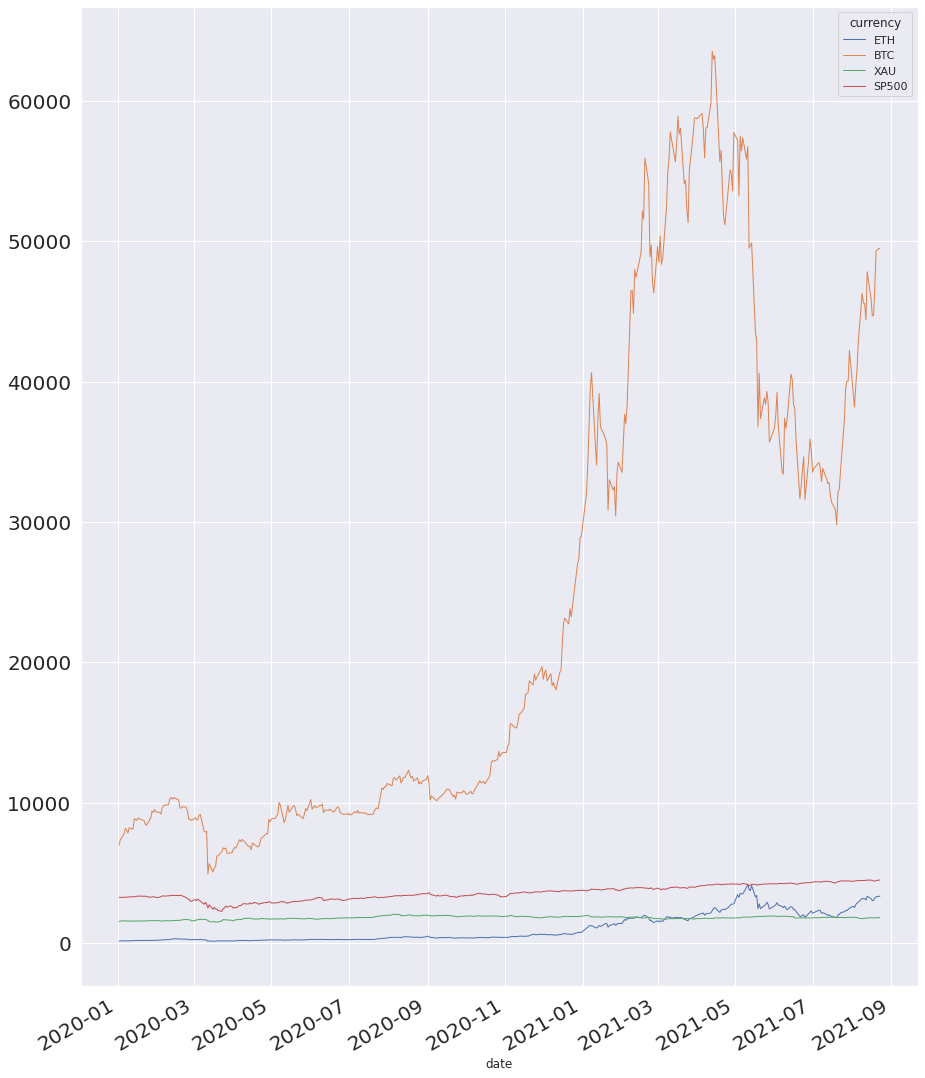

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.887439,0.187810,0.875211
BTC,0.887439,1.000000,0.136508,0.829056
XAU,0.187810,0.136508,1.000000,0.358017
SP500,0.875211,0.829056,0.358017,1.000000


In [8]:
#hide ### Koreliacijos matrica.

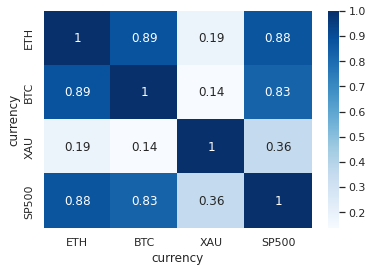

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')